# Laboratorio 3

### K-means, GMMs, Árboles y Random Forests

### Universidad de Antioquia

### Facultad de Ingeniería

### Ingeniería de Sistemas

### Ude@ - 2017-II

#### Profesor: Antonio Tamayo Herrera

### Integrantes:

#### Nombre: Andres Camilo Barrera
#### Cédula: 1036608440

#### Nombre: Erick Saenz Montoya
#### Cédula: 1017182924

## Guía del laboratorio

En esta archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

## Ejercicio 1

En la siguiente celda, complete el código donde le sea indicado. Debe consultar todo lo relacionado al método KMeans de la librería scikit-learn. Consultar aquí: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

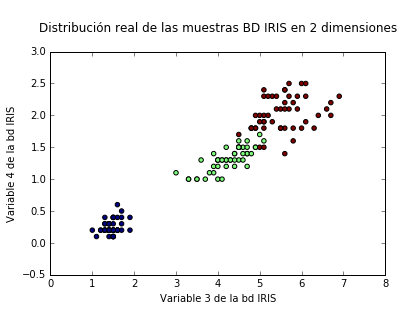



Descubriendo las clases con el método kMeans


Descubriendo 1 clusters:



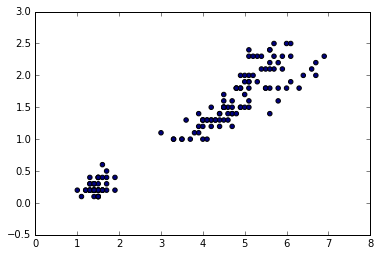

Predicción para la muestra 80 del mismo conjunto de entrenamiento
Cluster real al que pertenece: 1
Cluster predicho: [0]



Descubriendo 2 clusters:



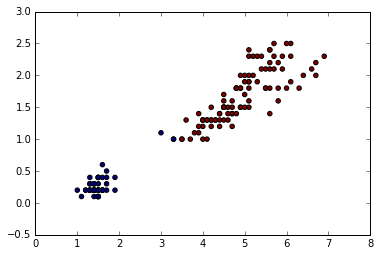

Predicción para la muestra 80 del mismo conjunto de entrenamiento
Cluster real al que pertenece: 1
Cluster predicho: [1]



Descubriendo 3 clusters:



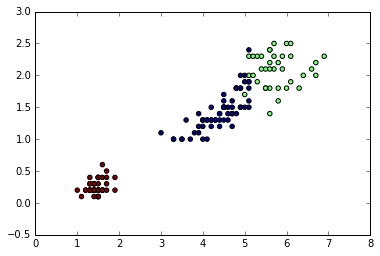

Predicción para la muestra 80 del mismo conjunto de entrenamiento
Cluster real al que pertenece: 1
Cluster predicho: [0]



Descubriendo 4 clusters:



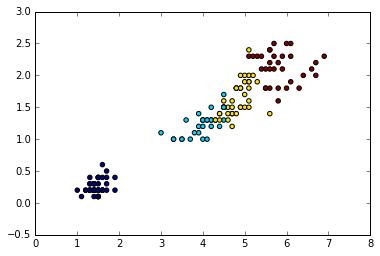

Predicción para la muestra 80 del mismo conjunto de entrenamiento
Cluster real al que pertenece: 1
Cluster predicho: [1]



Descubriendo 5 clusters:



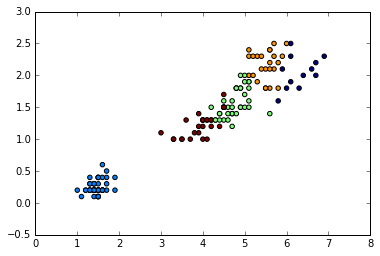

Predicción para la muestra 80 del mismo conjunto de entrenamiento
Cluster real al que pertenece: 1
Cluster predicho: [4]





In [9]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

plt.scatter(X[:,2], X[:,3], c=y)
plt.title(u'\nDistribución real de las muestras BD IRIS en 2 dimensiones\n')
plt.xlabel('Variable 3 de la bd IRIS')
plt.ylabel('Variable 4 de la bd IRIS')
plt.show()

print('\n\nDescubriendo las clases con el método kMeans\n\n')

for k in range(1,6,1):
    
    print('Descubriendo ' + str(k) + ' clusters:\n')
    #Complete el código llamando al método KMeans usando inicialización de los centroides de manera aleatoria
    #usando las muestras de entrenamiento, tal como lo explicamos en clase. Use el algorímo EM para el
    #Entrenamiento
    kmeans = KMeans(n_clusters=k, init='random', algorithm='full').fit(X)
    labels = kmeans.labels_
    plt.scatter(X[:,2], X[:,3], c=labels.astype(np.float), edgecolor='k')
    plt.show()
    
    
    print u"Predicción para la muestra 80 del mismo conjunto de entrenamiento"
    print "Cluster real al que pertenece: " + str(y[80]) 
    print "Cluster predicho: " +  str(kmeans.predict(X[80,:].reshape(1, -1)))
    print "\n\n"
    

1.1 Cómo explica la predicción hecha por el modelo para la asignación del cluster a la muestra 80 usando 2 y 3 clusters comparado con la predicción hecha para 1, 4 y 5 clusters?

Responda aquí: Aunque se realizo la ejecucion varias veces, en la mayoria de los casos la prediccion fue erronea.

## Ejercicio 2

En la siguiente celda, complete el código donde le sea indicado. Debe consultar todo lo relacionado al modelo GMMs de la librería scikit-learn. Consultar aquí: http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

iris = datasets.load_iris()

#Partiendo la base de datos de entrenamiento en 75% para entrenar y 25% para validar
skf = StratifiedKFold(n_splits=4)
# Tomando solo el primer fold
train_index, test_index = next(iter(skf.split(iris.data, iris.target)))

print("train_index: " + str(len(train_index)))
print("test_index: " + str(len(test_index)))

X_train = iris.data[train_index]
y_train = iris.target[train_index]
X_test = iris.data[test_index]
y_test = iris.target[test_index]

n_classes = len(np.unique(y_train))
#Complete el código aquí con la llamada al método GaussianMixture. Recuerde 
#que ya tiene el número de Gaussianas en n_classes
estimator =  GaussianMixture(n_components=n_classes, covariance_type='diag')

#Con la base de datos se realiza una inicialización de las medias de cada Gaussiana de manera supervisada
estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)for i in range(n_classes)])

#Complete el codigo aqui entrenando (ajustando) el modelo con la base de datos de entrenamiento
estimator.fit(X_train)
    
print "Eficiencia en la fase de entrenamiento:"
y_train_pred = estimator.predict(X_train)
train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
print train_accuracy

print "\nEficiencia en la fase de validación:"
#Complete el código aquí prediciendo el la clase para las muestras de validación
y_test_pred = estimator.predict(X_test)
test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
print test_accuracy

print "\n"
print class_error(y_test_pred, y_test)


train_index: 111
test_index: 39
Eficiencia en la fase de entrenamiento:
92.7927927928

Eficiencia en la fase de validación:
89.7435897436


accuracy: 0.897435897436


2.1 Ejecute el código de GMMs de la celda anterior usando una matriz de var-cov completa, esférica y diagonal. Qué observa en la eficiencia del modelo en cada uno de los tres casos? Cómo interpreta esos resultados?

Responda aquí:
Cuando se utilizan los métodos Full y Esférica la eficiencia permanece constante, mientras que con el método diagonal la eficiencia varía. El método que muestra una mayor eficiencia en las dos fases es el Full.
#### full
Eficiencia en la fase de entrenamiento:
94.5945945946

Eficiencia en la fase de validación:
97.4358974359

#### spherical
Eficiencia en la fase de entrenamiento:
88.2882882883

Eficiencia en la fase de validación:
92.3076923077

#### diag
Eficiencia en la fase de entrenamiento:
89.1891891892

Eficiencia en la fase de validación:
94.8717948718



2.2 Por qué el modelo GMM es un modelo generativo?

Responda aquí:
Porque una vez se conocen los parámetros de las distribuciones gaussianas se pueden generar nuevos datos.


2.3  Según la partición que se realizó a la base de datos para entrenamiento y validación, se puede afirmar que se está aplicando la metodología de validación correctamente? Responda sí o no y por qué.

Responda aquí: No, ya que lo ideal sería realizar la partición de manera aleatoria, pero en este caso siempre se toma un mismo conjunto de muestras para realizar el entrenamiento y un mismo conjunto de muestras para realizar la validación.


## Ejercicio 3

En la siguiente celda, complete el código donde le sea indicado. Debe consultar todo lo relacionado al modelo de árboles de decisión para clasificación de la librería scikit-learn. Consultar aquí: http://scikit-learn.org/stable/modules/tree.html#classification

accuracy: 0.974358974359
Tiempo Ejecucion: 0.00278806686401


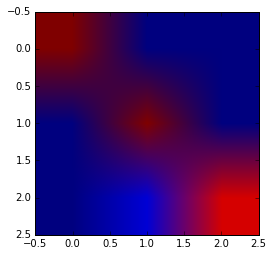

In [11]:
from __future__ import division
from sklearn import tree
from sklearn.metrics import confusion_matrix
from time import time


def class_error(y_est, y_real):
    err = 0
    for y_e, y_r in zip(y_est, y_real):
        if y_e != y_r:
            err += 1

    return "accuracy: " + str(1-(err/np.size(y_est)))

#Nota: con este modelo debe usar la misma base de datos IRIS que ya fue cargada para el modelo del ejercicio 2.

#Complete el código aquí creando el modelo de árbol clasificador y entrenandolo unicamente con las muestras de entrenamiento
#de la base de datos

tiempo_inicial = time() 

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)


#Complete el código aquí prediciendo la clase para las muestras de validación (test) de la base de datos.
y_pred = clf.predict(X_test)
print (class_error(y_pred, y_test))
tiempo_final = time()
tiempo_ejecucion = tiempo_final - tiempo_inicial
print("Tiempo Ejecucion: "+ str(tiempo_ejecucion))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(cnf_matrix)
plt.show()

## Ejercicio 4

En la siguiente celda, complete el código donde le sea indicado. Debe consultar todo lo relacionado al modelo de árboles de decisión para regresión de la librería scikit-learn. Consultar aquí: http://scikit-learn.org/stable/modules/tree.html#regression

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import normalize

#Error cuadrático medio (para problemas de regresión)
def ECM(Y_est,Y_real):
    N = np.size(Y_real)
    ecm = sum((Y_est - Y_real)**2)/N
    return ecm 

#cargamos la bd que está en un archivo .data y ahora la podemos manejar de forma matricial
db = np.loadtxt('DB/AirQuality.data',delimiter='\t')  # Assuming tab-delimiter

#Esta es la base de datos AirQuality del UCI Machine Learning Repository 
#https://archive.ics.uci.edu/ml/datasets/Air+Quality#

X = db[:,0:12]
Y = db[:,12]

#Numero de muestras
print("Numero de muestras: "+str(np.size(X,0)))

#Normalizamos los datos
X = normalize(X, axis=0, norm='l1')

#Partiendo la base de datos de entrenamiento en 75% para entrenar y 25% para validar.
skf = StratifiedKFold(n_splits=10)
# Solo se toma el primer fold
test_index, train_index = next(iter(skf.split(X, Y)))#Se cambio el orden porque estaba quedando 30% para entrenamiento
                                                    #70% para validacion


X_train = X[train_index]
y_train = Y[train_index]
X_test = X[test_index]
y_test = Y[test_index]

#Numero de muestras de entrenamiento
print("Numero de muestras de entrenamiento: "+str(np.size(X_train,0)))

#Numero de muestras de validación
print("Numero de muestras de validación: "+str(np.size(X_test,0)))

#Complete el código aquí creando el modelo de árbol para regresión y entrenando el modelo solo con las muestras
#de entrenamiento de la base de datos
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)

#Complete el código aquí prediciendo el valor para la variable de salida de las muestras de validación
#de la base de datos
Y_est = clf.predict(X_test)

for i in range(np.size(Y_est)):
    print("Real: %f Predicho: %f" % (y_test[i], Y_est[i]))
        
print "accuracy: "+str(1-ECM(Y_est, y_test))


Numero de muestras: 9357
Numero de muestras de entrenamiento: 6720
Numero de muestras de validación: 2637
Real: 0.665700 Predicho: 0.661000
Real: 0.745100 Predicho: 0.746200
Real: 0.853000 Predicho: 0.853300
Real: 0.873600 Predicho: 0.884800
Real: 0.909400 Predicho: 0.915800
Real: 0.866600 Predicho: 0.891000
Real: 0.876500 Predicho: 0.872800
Real: 0.920600 Predicho: 0.947600
Real: 0.991400 Predicho: 0.975100
Real: 0.826400 Predicho: 0.842800
Real: 0.823100 Predicho: 0.843300
Real: 0.911700 Predicho: 0.917750
Real: 0.821000 Predicho: 0.823700
Real: 0.853700 Predicho: 0.859300
Real: 0.786700 Predicho: 0.781800
Real: 0.751600 Predicho: 0.745500
Real: 0.809100 Predicho: 0.795100
Real: 0.844700 Predicho: 0.839650
Real: 0.709400 Predicho: 0.706500
Real: 0.745500 Predicho: 0.740900
Real: 0.698200 Predicho: 0.688300
Real: 0.650000 Predicho: 0.668300
Real: 0.665700 Predicho: 0.683450
Real: 0.704200 Predicho: 0.658000
Real: 0.727600 Predicho: 0.737500
Real: 0.712400 Predicho: 0.737500
Real: 0.68

Real: -200.000000 Predicho: -200.000000
Real: -200.000000 Predicho: -200.000000
Real: -200.000000 Predicho: -200.000000
Real: -200.000000 Predicho: -200.000000
Real: -200.000000 Predicho: -200.000000
Real: -200.000000 Predicho: -200.000000
Real: -200.000000 Predicho: -200.000000
Real: -200.000000 Predicho: -200.000000
Real: -200.000000 Predicho: -200.000000
Real: -200.000000 Predicho: -200.000000
Real: 1.091900 Predicho: 1.060900
Real: 0.940700 Predicho: 0.924800
Real: 1.166500 Predicho: 1.144300
Real: 1.152900 Predicho: 1.239800
Real: 1.144400 Predicho: 1.098700
Real: 1.168000 Predicho: 1.160300
Real: 1.166200 Predicho: 1.196450
Real: 1.127900 Predicho: 1.158600
Real: 1.122200 Predicho: 1.103600
Real: 1.248800 Predicho: 1.341000
Real: 1.222400 Predicho: 1.258500
Real: 1.474200 Predicho: 1.422600
Real: 1.428600 Predicho: 1.461100
Real: 1.412500 Predicho: 1.420100
Real: 1.333100 Predicho: 1.351000
Real: 1.166400 Predicho: 1.158600
Real: 1.334600 Predicho: 1.303300
Real: 1.291700 Predich

Real: 1.319500 Predicho: 1.339200
Real: 1.295000 Predicho: 1.284700
Real: 1.270200 Predicho: 1.284700
Real: 1.147700 Predicho: 1.133200
Real: 0.902600 Predicho: 0.905750
Real: 0.887800 Predicho: 0.901700
Real: 0.717600 Predicho: 0.708900
Real: 0.659100 Predicho: 0.642200
Real: 0.873600 Predicho: 0.870400
Real: 0.785600 Predicho: 0.775800
Real: 0.606000 Predicho: 0.610400
Real: 0.678800 Predicho: 0.729400
Real: 0.613700 Predicho: 0.616400
Real: 0.811600 Predicho: 0.835300
Real: 0.695000 Predicho: 0.699000
Real: 0.787200 Predicho: 0.775100
Real: 0.788300 Predicho: 0.789900
Real: 0.865200 Predicho: 0.835300
Real: 0.875500 Predicho: 0.863200
Real: 0.773700 Predicho: 0.770500
Real: 0.876800 Predicho: 0.857000
Real: 0.887800 Predicho: 0.885900
Real: 0.845200 Predicho: 0.805000
Real: 0.950600 Predicho: 0.919000
Real: 1.025300 Predicho: 0.972400
Real: 1.068800 Predicho: 1.092600
Real: 1.028500 Predicho: 1.002900
Real: 1.034600 Predicho: 1.002300
Real: 1.026400 Predicho: 1.025400
Real: 1.046400

Revise el número de muestras que tiene la base de datos con la que se está trabajando el problema de regresión.

4.1 Cuántas muestras tiene?

Responda aquí: 9357


4.2 Con cuántas muestras se está entrenando el modelo?

Responda aquí: 6720


4.3 Con cuántas se está validando?

Responda aquí: 2637



Nota: deje constancia en la celda anterior del código que usó para responder las preguntas anteriores.

4.4 Qué puede decir del costo computacional del modelo de árboles de regresión al ver su rendimiento con esta base de
datos?

Responda aquí:
Considero que es bastante eficiente. En laboratorios anteriores procesar esa cantidad de datos tomaba varios minutos, con este modelo toma aproximadamente 12 segundos.

## Ejercicio 5

En la siguiente celda, complete el código donde le sea indicado. Debe consultar todo lo relacionado al modelo Random Forests para clasificación de la librería scikit-learn. Consultar aquí: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [154]:
from sklearn.ensemble import RandomForestClassifier




#Partiendo la base de datos de entrenamiento en 75% para entrenar y 25% para validar.
skf = StratifiedKFold(n_splits=4)
# Solo se toma el primer fold
train_index, test_index = next(iter(skf.split(iris.data, iris.target)))

#Numero de muestras
print("Numero de muestras: "+str(np.size(iris.data,0)))

X_train = iris.data[train_index]
y_train = iris.target[train_index]
X_test = iris.data[test_index]
y_test = iris.target[test_index]

tiempo_inicial = time()
#Complete el código aquí creado el modelo Random Forest para clasificar y entrenandolo solo con las muestras
#para entrenamiento de la base de datos IRIS
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

#Complete el código aquí prediciendo la clase para las muestras de validación de la base de datos
Y_est = clf.predict(X_test)

print class_error(Y_est, y_test)
tiempo_final = time()
tiempo_ejecucion = tiempo_final - tiempo_inicial
print("Tiempo Ejecucion: "+ str(tiempo_ejecucion))

Numero de muestras: 150
accuracy: 0.974358974359
Tiempo Ejecucion: 0.139569997787
